In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test1 = pd.read_csv('X_test1.csv')
X_test2 = pd.read_csv('X_test2.csv')

In [3]:
Y_train = pd.read_csv('Y_train.csv')
Y_test1 = pd.read_csv('Y_test1.csv')
Y_test2 = pd.read_csv('Y_test2.csv')

In [4]:
print(X_train.shape)
print(X_test1.shape)
print(X_test2.shape)

(319121, 43)
(49377, 43)
(90415, 43)


In [5]:
final_features = X_train.columns

In [6]:
print(X_train.describe(percentiles=[0.01, 0.99]).transpose())

              count      mean       std           min        1%       50%  \
B_23       319121.0  0.172033  0.230156  8.752627e-07  0.001413  0.060950   
B_11       319121.0  0.111148  0.207896  7.786149e-08  0.000331  0.020533   
R_1        319121.0  0.078700  0.224015  1.534223e-09  0.000116  0.005828   
B_8        317861.0  0.470198  0.498685  2.536670e-08  0.000188  0.009373   
B_9        319121.0  0.192339  0.292920  4.327190e-08  0.000238  0.028482   
D_112      318824.0  0.848015  0.362966  4.297989e-07  0.001884  1.004069   
D_63_CO    319121.0  0.748663  0.433783  0.000000e+00  0.000000  1.000000   
D_52       316599.0  0.177679  0.174043 -6.997102e-03  0.004210  0.141723   
B_38_3.0   319121.0  0.220161  0.414356  0.000000e+00  0.000000  0.000000   
D_43       219423.0  0.156704  0.215651  1.615378e-06  0.002794  0.089571   
D_42        54285.0  0.188567  0.239372 -3.720193e-04  0.002701  0.122241   
R_26        36561.0  0.085712  0.240387  1.114640e-06  0.000204  0.037005   

In [7]:
for feature in final_features:
    p1 = X_train[feature].quantile(0.01)
    p99 = X_train[feature].quantile(0.99)
    X_train.loc[X_train[feature] < p1, feature] = p1
    X_train.loc[X_train[feature] > p99, feature] = p99
    X_test1.loc[X_test1[feature] < p1, feature] = p1
    X_test1.loc[X_test1[feature] > p99, feature] = p99
    X_test2.loc[X_test2[feature] < p1, feature] = p1
    X_test2.loc[X_test2[feature] > p99, feature] = p99

In [8]:
print(X_train.describe(percentiles=[0.01, 0.99]).transpose())

              count      mean       std       min        1%       50%  \
B_23       319121.0  0.170770  0.224861  0.001413  0.001413  0.060950   
B_11       319121.0  0.109337  0.198669  0.000331  0.000331  0.020533   
R_1        319121.0  0.074814  0.201653  0.000116  0.000116  0.005828   
B_8        317861.0  0.470197  0.498683  0.000188  0.000188  0.009373   
B_9        319121.0  0.187446  0.255027  0.000238  0.000238  0.028482   
D_112      318824.0  0.848023  0.362946  0.001884  0.001884  1.004069   
D_63_CO    319121.0  0.748663  0.433783  0.000000  0.000000  1.000000   
D_52       316599.0  0.177692  0.173920  0.004210  0.004210  0.141723   
B_38_3.0   319121.0  0.220161  0.414356  0.000000  0.000000  0.000000   
D_43       219423.0  0.151951  0.179295  0.002794  0.002794  0.089571   
D_42        54285.0  0.182787  0.199212  0.002701  0.002701  0.122241   
R_26        36561.0  0.076475  0.148437  0.000204  0.000205  0.037005   
D_44       302476.0  0.115237  0.204115  0.000152  

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [10]:
X_train_normalized = sc.transform(X_train)
X_test1_normalized = sc.transform(X_test1)
X_test2_normalized = sc.transform(X_test2)

In [11]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns= X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns= X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns= X_test2.columns)

In [12]:
X_train_normalized.fillna(0, inplace = True)
X_test1_normalized.fillna(0, inplace = True)
X_test2_normalized.fillna(0, inplace = True)

In [13]:
X_train_normalized.isna().sum()

B_23         0
B_11         0
R_1          0
B_8          0
B_9          0
D_112        0
D_63_CO      0
D_52         0
B_38_3.0     0
D_43         0
D_42         0
R_26         0
D_44         0
D_49         0
B_4          0
B_6          0
B_2          0
D_41         0
D_132        0
D_66_1.0     0
D_75         0
B_1          0
P_2          0
D_46         0
D_48         0
D_64_O       0
B_3          0
D_45         0
D_63_CL      0
R_27         0
B_38_2.0     0
D_114_1.0    0
D_51         0
B_7          0
D_56         0
D_50         0
B_39         0
B_38_4.0     0
S_3          0
S_22         0
R_3          0
D_77         0
D_79         0
dtype: int64

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [15]:
def build_two_layer(unit, activation_func, dropout_rate):
    classifier = Sequential()
    classifier.add(Dense(units = unit, kernel_initializer = 'glorot_uniform',
                         activation = activation_func))
    classifier.add(Dropout(dropout_rate))
    
    classifier.add(Dense(units = unit, kernel_initializer = 'glorot_uniform',
                         activation = activation_func))
    classifier.add(Dropout(dropout_rate))
    
    classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',
                         activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])
    
    return classifier

In [21]:
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["HL",  "#Node", "Activation Function", "Dropout",
                                "Batch Size", "AUC Train", "AUC Test 1", "AUC Test 2"])

table

,HL,#Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2


In [17]:
row = 0
for unit in [4, 6]:
    for activation_func in ['relu', 'tanh']:
        for dropout_rate in [0, 0.5]:
            for batch_size in [100, 10000]:
                model = build_two_layer(unit, activation_func, dropout_rate)
                model.fit(X_train_normalized, Y_train, epochs= 20, batch_size= batch_size, verbose= 0)
                table.loc[row, 'HL'] = 2
                table.loc[row, '#Node'] = unit
                table.loc[row, 'Activation Function'] = activation_func
                table.loc[row, 'Dropout'] = dropout_rate
                table.loc[row, 'Batch Size'] = batch_size
                table.loc[row, 'AUC Train'] = roc_auc_score(Y_train, model.predict(X_train_normalized)[:, 0])
                table.loc[row, 'AUC Test 1'] = roc_auc_score(Y_test1, model.predict(X_test1_normalized)[:, 0])
                table.loc[row, 'AUC Test 2'] = roc_auc_score(Y_test2, model.predict(X_test2_normalized)[:, 0])
                row = row + 1


table

2826/2826 [==============================] - 5s 2ms/step


,HL,#Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,0,100,0.929735,0.915356,0.940173
1,2,4,relu,0,10000,0.924561,0.909643,0.935393
2,2,4,relu,0.5,100,0.928508,0.914338,0.939105
3,2,4,relu,0.5,10000,0.923054,0.909123,0.934169
4,2,4,tanh,0,100,0.930185,0.916506,0.939746
5,2,4,tanh,0,10000,0.925948,0.912699,0.935541
6,2,4,tanh,0.5,100,0.928253,0.914501,0.938507
7,2,4,tanh,0.5,10000,0.926929,0.914247,0.937425
8,2,6,relu,0,100,0.930799,0.917025,0.939795
9,2,6,relu,0,10000,0.9264,0.912181,0.936956


In [16]:
def build_four_layer(unit, activation_func, dropout_rate):
    classifier = Sequential()
    classifier.add(Dense(units = unit, kernel_initializer = 'glorot_uniform',
                         activation = activation_func))
    classifier.add(Dropout(dropout_rate))
    
    classifier.add(Dense(units = unit, kernel_initializer = 'glorot_uniform',
                         activation = activation_func))
    classifier.add(Dropout(dropout_rate))
    
    classifier.add(Dense(units = unit, kernel_initializer = 'glorot_uniform',
                         activation = activation_func))
    classifier.add(Dropout(dropout_rate))
    
    classifier.add(Dense(units = unit, kernel_initializer = 'glorot_uniform',
                         activation = activation_func))
    classifier.add(Dropout(dropout_rate))
    
    classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',
                         activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])
    
    return classifier

In [19]:
row = row
for unit in [4, 6]:
    for activation_func in ['relu', 'tanh']:
        for dropout_rate in [0, 0.5]:
            for batch_size in [100, 10000]:
                model = build_four_layer(unit, activation_func, dropout_rate)
                model.fit(X_train_normalized, Y_train, epochs= 20, batch_size= batch_size, verbose= 0)
                table.loc[row, 'HL'] = 4
                table.loc[row, '#Node'] = unit
                table.loc[row, 'Activation Function'] = activation_func
                table.loc[row, 'Dropout'] = dropout_rate
                table.loc[row, 'Batch Size'] = batch_size
                table.loc[row, 'AUC Train'] = roc_auc_score(Y_train, model.predict(X_train_normalized)[:, 0])
                table.loc[row, 'AUC Test 1'] = roc_auc_score(Y_test1, model.predict(X_test1_normalized)[:, 0])
                table.loc[row, 'AUC Test 2'] = roc_auc_score(Y_test2, model.predict(X_test2_normalized)[:, 0])
                row = row + 1

print(row)
table

2826/2826 [==============================] - 2s 825us/step
32


,HL,#Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,0,100,0.929735,0.915356,0.940173
1,2,4,relu,0,10000,0.924561,0.909643,0.935393
2,2,4,relu,0.5,100,0.928508,0.914338,0.939105
3,2,4,relu,0.5,10000,0.923054,0.909123,0.934169
4,2,4,tanh,0,100,0.930185,0.916506,0.939746
5,2,4,tanh,0,10000,0.925948,0.912699,0.935541
6,2,4,tanh,0.5,100,0.928253,0.914501,0.938507
7,2,4,tanh,0.5,10000,0.926929,0.914247,0.937425
8,2,6,relu,0,100,0.930799,0.917025,0.939795
9,2,6,relu,0,10000,0.9264,0.912181,0.936956


In [23]:
table.to_csv('NN_table.csv', index = False)

In [24]:
final_model = build_four_layer(6, 'relu', 0)
final_model.fit(X_train_normalized, Y_train, epochs= 20, batch_size= 100)

Epoch 1/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.3101 - accuracy: 0.8530
Epoch 2/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2917 - accuracy: 0.8651
Epoch 3/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2909 - accuracy: 0.8658
Epoch 4/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2904 - accuracy: 0.8659
Epoch 5/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2901 - accuracy: 0.8663
Epoch 6/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2897 - accuracy: 0.8663
Epoch 7/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2895 - accuracy: 0.8667
Epoch 8/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2894 - accuracy: 0.8665
Epoch 9/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.2893 - accuracy: 0.8668
Epoch 10/20
3192/3192 [==============================] - 4s 1ms/step - loss: 0.289

In [25]:
table.loc[row, 'HL'] = 4
table.loc[row, '#Node'] = 6
table.loc[row, 'Activation Function'] = 'relu'
table.loc[row, 'Dropout'] = 0
table.loc[row, 'Batch Size'] = 100
table.loc[row, 'AUC Train'] = roc_auc_score(Y_train, final_model.predict(X_train_normalized)[:, 0])
table.loc[row, 'AUC Test 1'] = roc_auc_score(Y_test1, final_model.predict(X_test1_normalized)[:, 0])
table.loc[row, 'AUC Test 2'] = roc_auc_score(Y_test2, final_model.predict(X_test2_normalized)[:, 0])

2826/2826 [==============================] - 2s 804us/step


In [26]:
table

,HL,#Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,4,6,relu,0,100,0.930966,0.916781,0.940133


In [32]:
preds = final_model.predict(X_train_normalized)
print(preds[:,0])
preds.shape


9973/9973 [==============================] - 8s 789us/step
[3.4258285e-04 7.2632182e-01 4.5224693e-02 ... 1.0888937e-01 1.2158523e-01
 2.8101172e-02]


(319121, 1)

In [ ]:
list(Y_train['target'])

In [35]:
final_model.predict(X_train_normalized)[:,0]

9973/9973 [==============================] - 8s 782us/step


array([3.4258285e-04, 7.2632182e-01, 4.5224693e-02, ..., 1.0888937e-01,
       1.2158523e-01, 2.8101172e-02], dtype=float32)

In [42]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": list(Y_train['target']), "Prediction": final_model.predict(X_train_normalized)[:,0]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]

table2 = stat.reset_index()

9973/9973 [==============================] - 8s 781us/step


In [43]:
table2

,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00173]",50,31913,0.001567
1,"(0.00173, 0.00357]",91,31912,0.002852
2,"(0.00357, 0.00737]",186,31912,0.005829
3,"(0.00737, 0.0176]",394,31912,0.012346
4,"(0.0176, 0.054]",1203,31912,0.037697
5,"(0.054, 0.17]",3623,31912,0.113531
6,"(0.17, 0.383]",9299,31912,0.291395
7,"(0.383, 0.588]",16545,31912,0.518457
8,"(0.588, 0.777]",22704,31912,0.711457
9,"(0.777, 1.0]",27921,31912,0.874937


In [44]:
import matplotlib.pyplot as plt

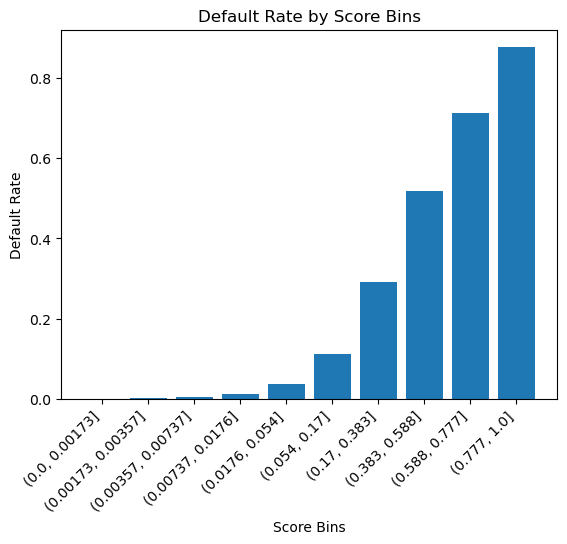

In [45]:
# Create bar chart
plt.bar(table2.index, table2['Bad Rate'], width=0.8, align='center')

# Set x-ticks to the Score Bins
plt.xticks(table2.index, table2['Score Bins'], rotation=45, ha='right')

# Set axis labels and title
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Default Rate by Score Bins')

# Show the plot
plt.show()

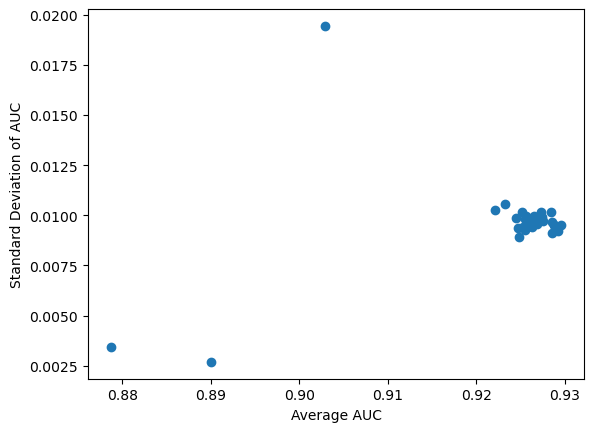

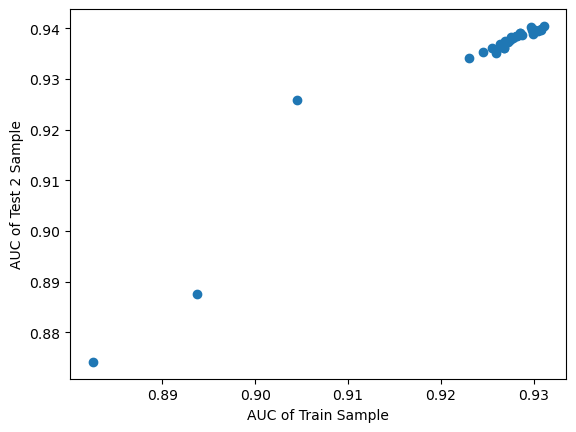

In [19]:
table = pd.read_csv('NN_table.csv')

table['auc_mean'] = np.mean(table[['AUC Train', 'AUC Test 1', 'AUC Test 2']], axis=1)
table['auc_std'] = np.std(table[['AUC Train', 'AUC Test 1', 'AUC Test 2']], axis=1)

import matplotlib.pyplot as plt

# Create scatter plot 1
plt.scatter(table['auc_mean'], table['auc_std'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.show()

# Create scatter plot 2
plt.scatter(table['AUC Train'], table['AUC Test 2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.show()
